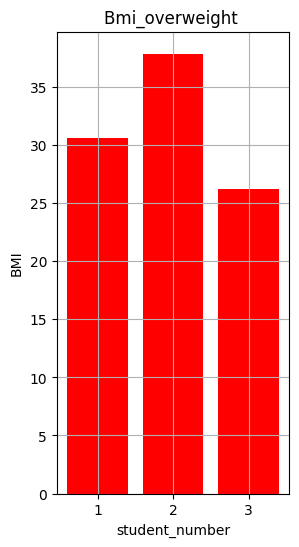

In [ ]:
import random 
import matplotlib.pyplot as plt
import pandas as pd


class BMI(): 
    def __init__(self,name:str,height:int,weight:int): 
        self.name = name
        self.height = height
        self.weight = weight

    def get_bmi(self)->float: #取得bmi
        return round(self.weight / (self.height/100) ** 2,ndigits=2)
    
    def get_status(self)->str:  #取得status
        bmi = self.get_bmi()
        if bmi >=35:
            status = "您的體重:重度肥胖"
        elif bmi >= 30:
            status = "您的體重:中度肥胖"
        elif bmi >= 27:
            status = "您的體重:輕度肥胖"
        elif bmi >= 24:
            status = "您的體重:過重"
        elif bmi >= 18.5:
            status = "您的體重:正常範圍"
        else:
            status = "您的體重:體重過輕"
        return status

def get_name(nums:int=2)->list[str]: #抓取name.txt裡面的名字
    with open('names.txt',mode='r',encoding='utf-8') as file:
            names_str = file.read()
    names = names_str.split()
    names = random.choices(names,k=nums)
    return  names
     
def generate_bmi(names:list[str])->list[BMI]: 
    students:list[BMI] = []
    for name in names:
        height = random.randint(140,190)
        weight = random.randint(50,110)
        student_STATUS = BMI(name, height, weight)
        students.append(student_STATUS) #list實體化 
    return students

def Bmi_overweight(pd1: pd.DataFrame):#製作出BMI過高人員圖表
    bmi_overweight = pd1['BMI'] > 24
    pd2 = pd1[bmi_overweight]     
    figure_width = max(3, len(pd2) * 0.4)  # 設置圖表大小，並隨著人數增長而增大
    figure_height = 6
    figure = plt.figure(figsize=(figure_width, figure_height))

    axes = figure.add_subplot()   
    axes.bar(pd2.index, pd2['BMI'], color='red')
    axes.set_xlabel('student_number')
    axes.set_ylabel('BMI')
    axes.set_title('Bmi_overweight ')
    axes.grid()
    axes.set_xticks(pd2.index)  # X 軸位置為 pd2 的 index (學號)
    axes.set_xticklabels(pd2.index)



if __name__ == '__main__':
    nums = int(input('請輸入人數:'))
    names:list[str] = get_name(nums=nums)
    students:list[BMI] = generate_bmi(names=names)
    file_dict:list[dict] = []
    for student in students:  
        #將資料轉換成字典
        student_dict = {
        "姓名": student.name,
        "身高": student.height,
        "體重": student.weight,
        "BMI": student.get_bmi(),
        "狀態": student.get_status()
        }
        file_dict.append(student_dict)  #寫入list[dict]

        # 請將file_dict:list[dict]轉變為DataFrame       
        
pd1 = pd.DataFrame(file_dict,
    columns=['姓名', '身高', '體重', 'BMI', '狀態'],
    index = range(1, (len(file_dict))+1))
pd1.columns.name='學號 '
        
print(pd1)
Bmi_overweight(pd1)
plt.show()


#將Bmi過高人員依圖表顯示






